# Principal Component Analysis (PCA) for Data Visualization
## Dataset: Regensburg Pediatric Appendicitis

The link to the dataset is [here](https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis).

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()

# Dateset
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 
  
# data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 
  
# variable information 
print(regensburg_pediatric_appendicitis.variables)


                                name     role         type demographic  \
0                                Age  Feature   Continuous         Age   
1                                BMI  Feature   Continuous        None   
2                                Sex  Feature  Categorical         Sex   
3                             Height  Feature   Continuous        None   
4                             Weight  Feature      Integer        None   
5                     Length_of_Stay  Feature      Integer        None   
6                         Management   Target  Categorical        None   
7                           Severity   Target  Categorical        None   
8              Diagnosis_Presumptive    Other       Binary        None   
9                          Diagnosis   Target       Binary        None   
10                    Alvarado_Score  Feature      Integer        None   
11     Paedriatic_Appendicitis_Score  Feature      Integer        None   
12                    Appendix_on_US  

In [76]:
# Data Cleaning
# All Catagorical Features are converted into numerical features
# All the missing values are filled with mean of the column
# All the values are normalized between 0 and 1
# All the columns are converted into float type

# Convert all the catagorical features into numerical features
X = pd.get_dummies(X)
y = pd.get_dummies(y)

# Fill all the missing values with mean of the column
X.fillna(X.mean(), inplace=True)

# Assuming 'df' is your DataFrame
print(X.shape)

# Normalize all the values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Convert all the columns into float type
X = X.astype(float)

# Assuming 'df' is your DataFrame
print(X.shape)

(782, 148)
(782, 148)


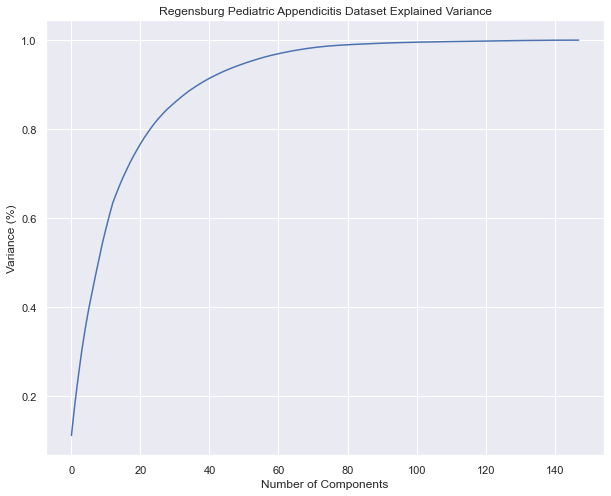

In [77]:
# Analysis of the Components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Regensburg Pediatric Appendicitis Dataset Explained Variance')
plt.show()

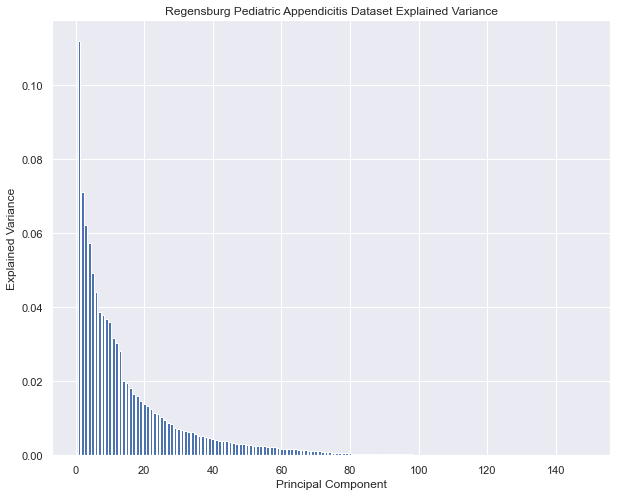

In [78]:
# Plot the percentage of variance explained by each component.
plt.figure(figsize=(10,8))
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Regensburg Pediatric Appendicitis Dataset Explained Variance')
plt.show()


In [79]:
import numpy as np

class PCA_df:
    """
    A simple PCA implementation that can be used with Pandas DataFrames.

    Parameters
    ----------
    n_components : int or float
        Number of components to keep. If float, it represents the ratio of variance explained by the components.

    Attributes
    ----------
    n_components : int
        Number of components to keep.
    components : numpy array
        Principal components.
    mean : numpy array
        Mean of the data.
    """    
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Covariance matrix (function needs samples as columns)
        cov = np.cov(X_centered.T)

        # Eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # Sort eigenvectors by eigenvalues in descending order
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]

        # Calculate the number of components if n_components is a ratio
        if isinstance(self.n_components, float):
            cum_var_explained = np.cumsum(eigenvalues) / np.sum(eigenvalues)
            self.n_components = np.argmax(cum_var_explained >= self.n_components) + 1

        # Store first n eigenvectors
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Project data
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

# Example usage
# Assuming 'X' is your data matrix
pca_df = PCA_df(n_components=0.95)
pca_df.fit(X)
X_projected = pca_df.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)


Shape of X: (782, 148)
Shape of transformed X: (782, 52)


In [80]:
# KNN before PCA and after PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# KNN before PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy before PCA: ", accuracy_score(y_test, y_pred))

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.3)

# KNN after PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy after PCA: ", accuracy_score(y_test, y_pred))


Accuracy before PCA:  0.6
Accuracy after PCA:  0.574468085106383
